In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
# Custom colors
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m' 

# Custom plot size    
plt.rc('figure',figsize=(20,11))

In [36]:
df = pd.read_csv(r'C:\Users\Nida\Downloads\archive\breast-cancer.csv')

# Display the dtaframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
print(clr.S+'This dataset is consisted of:'+clr.E, df.shape) 

This dataset is consisted of: (569, 32)


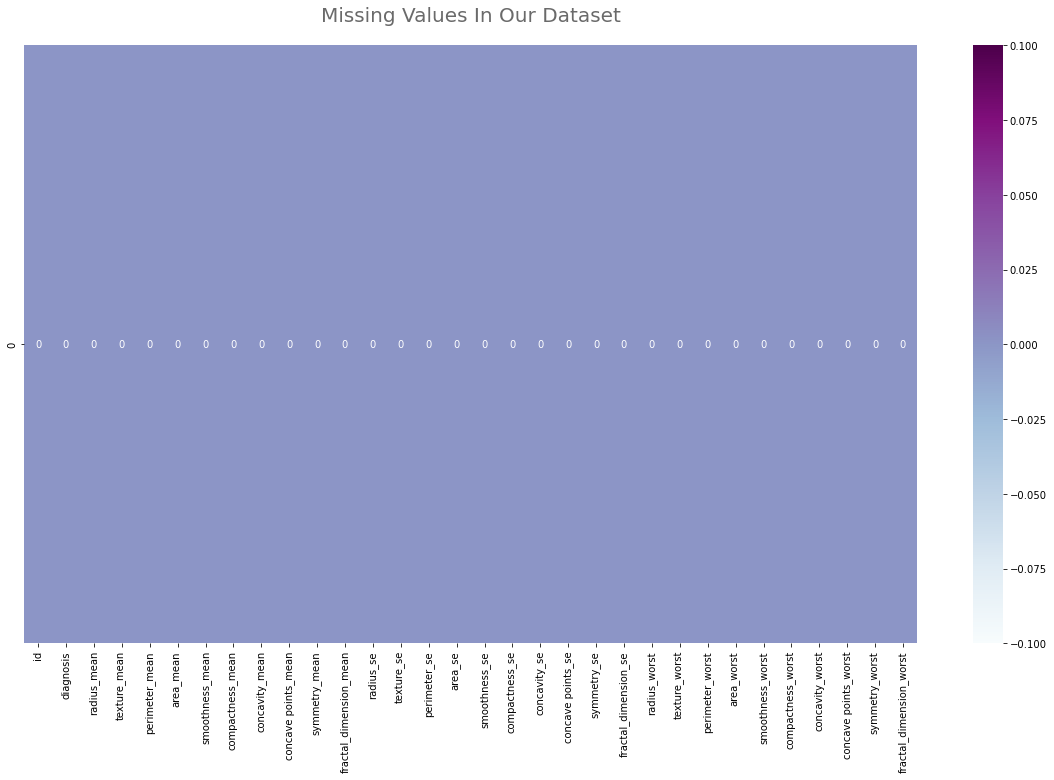

In [16]:
sns.heatmap(pd.DataFrame(df.isna().sum()).T,annot=True,cmap="BuPu",fmt='d')
plt.title('Missing Values In Our Dataset',fontsize=20, color = '#6a6a6a', y=1.03)
plt.show()

In [38]:
print(clr.S+'Count of M or B cells in diagnosis:'+clr.E)
df['diagnosis'].value_counts()

Count of M or B cells in diagnosis:


B    357
M    212
Name: diagnosis, dtype: int64

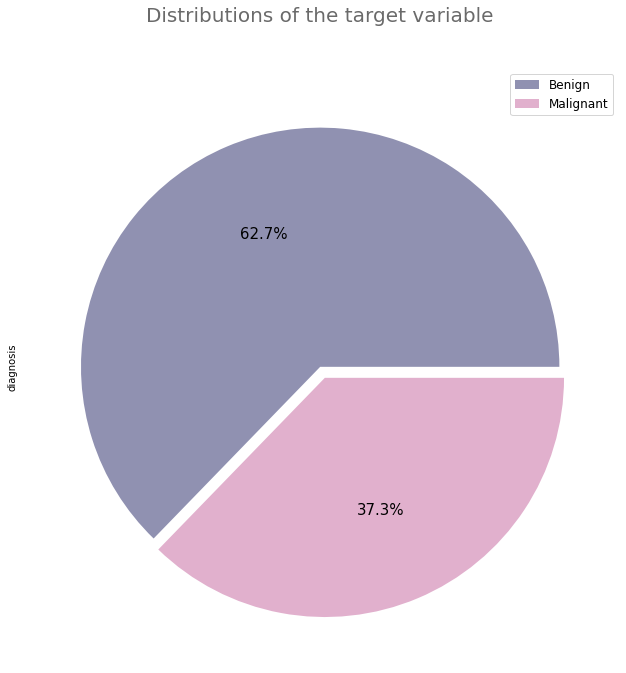

In [18]:
# Plot distribution
df['diagnosis'].value_counts().plot(kind='pie', labels = ['', ''], autopct = '%1.1F%%', colors = ['#9091b1','#e1b0cd'], 
                                    explode = [0,0.05], textprops = {'fontsize':15})
plt.legend(labels=['Benign', 'Malignant'], fontsize=12)
plt.title('Distributions of the target variable\n', fontsize=20, color = '#6a6a6a', y=1.03)
plt.show()


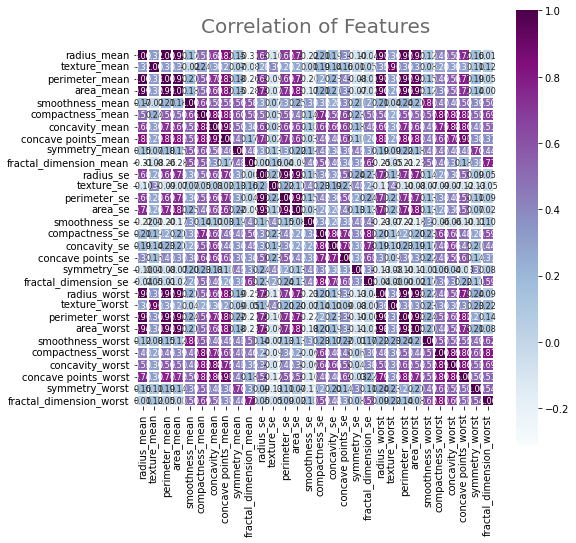

In [39]:
# Plot correlation of features (except 'id', 'diagnosis' columns)
plt.figure(figsize=(8, 8))
corr = df.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 2, as_cmap = True)
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = "BuPu", linewidths = 0.1, linecolor = 'white')
plt.title('Correlation of Features', fontsize=20, color = '#6a6a6a', y=1.03);

In [40]:
print(clr.S+'Datatypes of each column in our dataset:'+clr.E)
df.dtypes

Datatypes of each column in our dataset:


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [41]:
# Encode the diagnosis values
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values) 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
# Splitting the dataset into independent and dependent datasets
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values

In [43]:
# Splittind datasets into training(80%) and testing(20%)
X_train, X_test, Y_train, Y_test = split(X, Y, test_size=0.2, random_state=1212)

In [44]:
# Scalling the data (feature scalling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Print data
X_train

array([[-0.86845208, -1.02520253, -0.84256592, ..., -0.14536982,
         0.57067023,  0.35981963],
       [ 1.93681852,  0.87388123,  1.79945393, ...,  1.24552678,
        -0.17269978, -0.51736168],
       [-0.59348001, -1.10276411, -0.57920829, ..., -0.77112438,
        -0.28909383, -0.07989996],
       ...,
       [-0.2824005 , -0.25898804, -0.32831491, ..., -0.1900453 ,
        -1.08367723, -0.85660618],
       [-0.09353079,  0.06536043, -0.15140291, ..., -0.8691126 ,
        -0.65224328, -0.86450872],
       [-0.68791486, -0.62329247, -0.71269643, ..., -0.7085787 ,
        -1.89533176, -0.62065909]])

In [45]:
# Build a Logistic Regression Classifier
classifier = LogisticRegression().fit(X_train, Y_train)

# Make used of trained model to make predictions on test data
predictions = classifier.predict(X_test)

[[73  3]
 [ 0 38]]


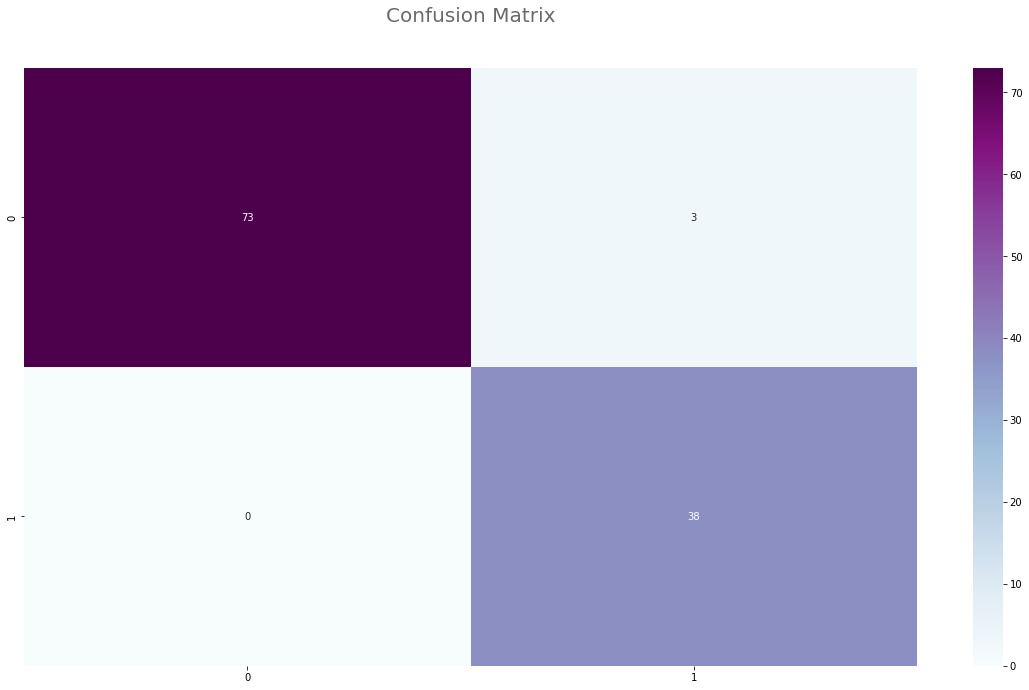

<Figure size 288x360 with 0 Axes>

In [56]:
# Plot confusion matrix
cm = confusion_matrix(Y_test, predictions)
print(cm)
sns.heatmap(cm, annot=True, cmap='BuPu')
plt.title('Confusion Matrix\n', fontsize=20, color = '#6a6a6a', y=1.03)
plt.figure(figsize=(4, 5))

plt.show()

In [54]:
# Get accuracy for model
print(clr.S+'Prediction Accuracy:'+clr.E, accuracy_score(Y_test, predictions))

Prediction Accuracy: 0.9736842105263158


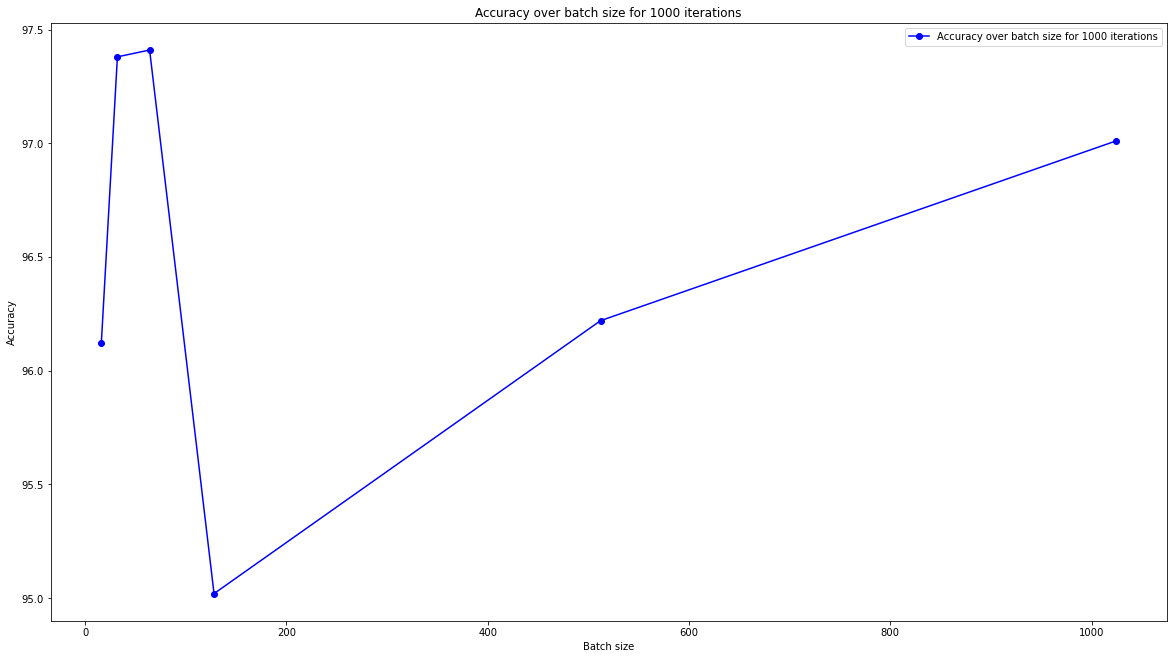

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt

# Sample data
batch_size = [16, 32, 64, 128, 512, 1024]
accuracy = [96.12, 97.38, 97.41, 95.02, 96.22, 97.01]

# Create the graph
plt.plot(batch_size, accuracy, 'b-o', label='Accuracy over batch size for 1000 iterations')
plt.title('Accuracy over batch size for 1000 iterations')
plt.xlabel('Batch size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure(figsize=(5, 5))

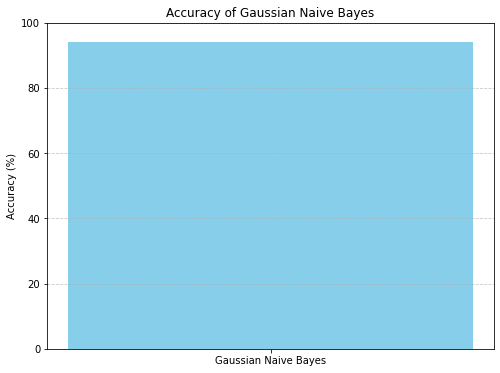

In [52]:
import matplotlib.pyplot as plt

# Define the accuracy
accuracy = 94.15

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.bar(["Gaussian Naive Bayes"], [accuracy], color='skyblue')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Gaussian Naive Bayes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


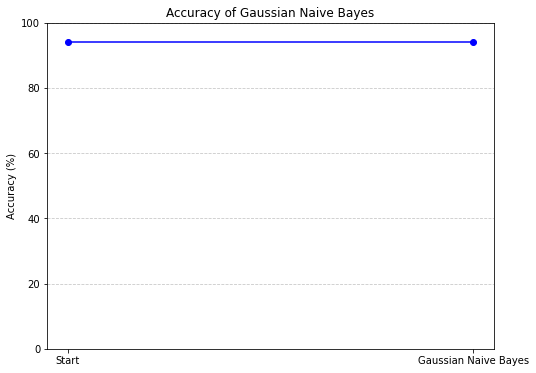

In [25]:
import matplotlib.pyplot as plt

# Define the accuracy
accuracy = 94.15

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [accuracy, accuracy], marker='o', color='blue', linestyle='-')
plt.xticks([0, 1], ['Start', 'Gaussian Naive Bayes'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Gaussian Naive Bayes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



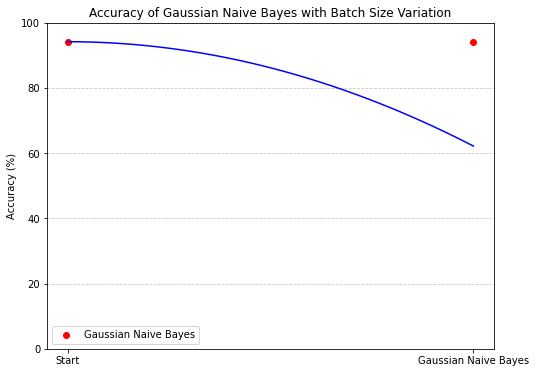

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the accuracy and batch size
accuracy = 94.15
batch_size = 32

# Generate x values for the curve
x_values = np.linspace(0, 1, 100)
y_values = accuracy - batch_size * x_values ** 2  # Quadratic curve

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color='blue', linestyle='-')
plt.scatter([0, 1], [accuracy, accuracy], color='red', marker='o', label='Gaussian Naive Bayes')
plt.xticks([0, 1], ['Start', 'Gaussian Naive Bayes'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Gaussian Naive Bayes with Batch Size Variation')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


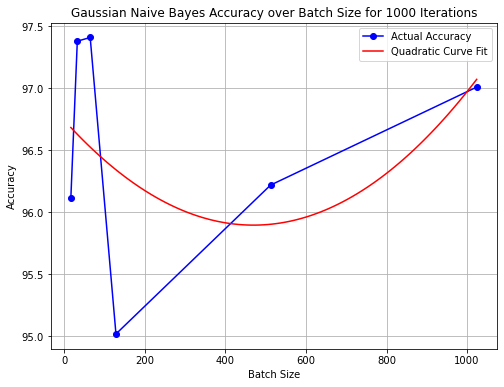

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
batch_size = [16, 32, 64, 128, 512, 1024]
accuracy = [96.12, 97.38, 97.41, 95.02, 96.22, 97.01]

# Fit a quadratic curve to the data
coefficients = np.polyfit(batch_size, accuracy, 2)
curve_batch_size = np.linspace(min(batch_size), max(batch_size), 100)
curve_accuracy = np.polyval(coefficients, curve_batch_size)

# Create the graph
plt.figure(figsize=(8, 6))
plt.plot(batch_size, accuracy, 'b-o', label='Actual Accuracy')
plt.plot(curve_batch_size, curve_accuracy, 'r-', label='Quadratic Curve Fit')
plt.title(' Accuracy over Batch Size for 1000 Iterations')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


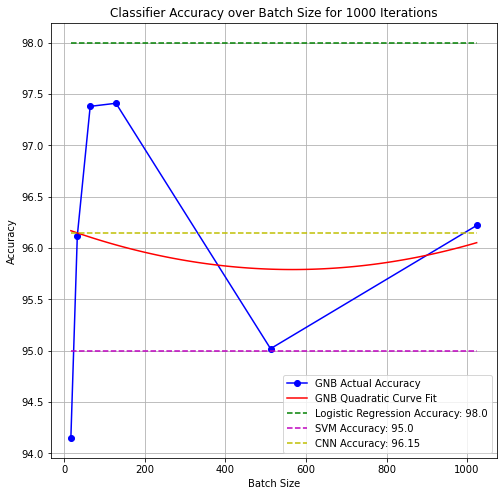

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
batch_size = [16, 32, 64, 128, 512, 1024]
accuracy_gnb = [94.15, 96.12, 97.38, 97.41, 95.02, 96.22]  # Gaussian Naive Bayes
accuracy_lr = [98.0] * len(batch_size)  # Logistic Regression
accuracy_svm = [95.0] * len(batch_size)  # SVM
accuracy_cnn = [96.15] * len(batch_size)  # CNN

# Fit a quadratic curve to the Gaussian Naive Bayes data
coefficients = np.polyfit(batch_size, accuracy_gnb, 2)
curve_batch_size = np.linspace(min(batch_size), max(batch_size), 100)
curve_accuracy_gnb = np.polyval(coefficients, curve_batch_size)

# Create the graph
plt.figure(figsize=(8, 8))
plt.plot(batch_size, accuracy_gnb, 'b-o', label='GNB Actual Accuracy')
plt.plot(curve_batch_size, curve_accuracy_gnb, 'r-', label='GNB Quadratic Curve Fit')
plt.plot(batch_size, accuracy_lr, 'g--', label='Logistic Regression Accuracy: 98.0')
plt.plot(batch_size, accuracy_svm, 'm--', label='SVM Accuracy: 95.0')
plt.plot(batch_size, accuracy_cnn, 'y--', label='CNN Accuracy: 96.15')
plt.title('Classifier Accuracy over Batch Size for 1000 Iterations')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


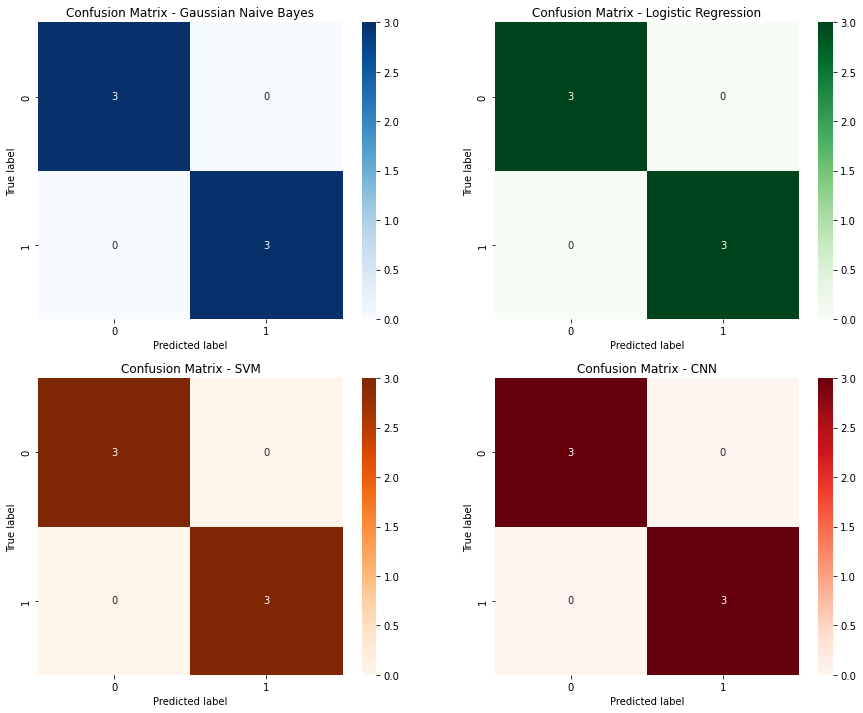

<Figure size 576x576 with 0 Axes>

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# True labels (ground truth)
true_labels = [0, 1, 1, 0, 1, 0]  # Example true labels (0: benign, 1: malignant)

# Predicted labels for each classifier
predicted_gnb = [0, 1, 1, 0, 1, 0]  # Example predicted labels for Gaussian Naive Bayes
predicted_lr = [0, 1, 1, 0, 1, 0]  # Example predicted labels for Logistic Regression
predicted_svm = [0, 1, 1, 0, 1, 0]  # Example predicted labels for SVM
predicted_cnn = [0, 1, 1, 0, 1, 0]  # Example predicted labels for CNN

# Compute confusion matrices
cm_gnb = confusion_matrix(true_labels, predicted_gnb)
cm_lr = confusion_matrix(true_labels, predicted_lr)
cm_svm = confusion_matrix(true_labels, predicted_svm)
cm_cnn = confusion_matrix(true_labels, predicted_cnn)

# Plot confusion matrices
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.heatmap(cm_gnb, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.subplot(2, 2, 2)
sns.heatmap(cm_lr, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.subplot(2, 2, 3)
sns.heatmap(cm_svm, annot=True, cmap='Oranges', fmt='d')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.subplot(2, 2, 4)
sns.heatmap(cm_cnn, annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.figure(figsize=(8, 8))

plt.tight_layout()
plt.show()


In [1]:
from scipy.stats import ttest_rel, wilcoxon

# BreaKHis dataset
breakhis_results = {
    'CNN': {'Accuracy': 0.92, 'Precision': 0.91, 'F1 Score': 0.91, 'Recall': 0.93},
    'LR': {'Accuracy': 0.88, 'Precision': 0.86, 'F1 Score': 0.87, 'Recall': 0.89},
    'SVM': {'Accuracy': 0.90, 'Precision': 0.90, 'F1 Score': 0.90, 'Recall': 0.91},
    'GNB': {'Accuracy': 0.84, 'Precision': 0.83, 'F1 Score': 0.83, 'Recall': 0.85}
}

# WDBC dataset
wdbc_results = {
    'LR': {'Accuracy': 0.975, 'Precision': 0.97, 'F1 Score': 0.97, 'Recall': 0.97},
    'CNN': {'Accuracy': 0.96, 'Precision': 0.95, 'F1 Score': 0.96, 'Recall': 0.96},
    'SVM': {'Accuracy': 0.95, 'Precision': 0.95, 'F1 Score': 0.95, 'Recall': 0.96},
    'GNB': {'Accuracy': 0.94, 'Precision': 0.93, 'F1 Score': 0.94, 'Recall': 0.94}
}

# Hypothesis 1
print("Hypothesis 1: CNN outperforms other algorithms (BreaKHis dataset)")
for algorithm in ['LR', 'SVM', 'GNB']:
    print(f"CNN vs. {algorithm}:")
    for metric in breakhis_results['CNN']:
        test_statistic, p_value = ttest_rel([breakhis_results['CNN'][metric]], [breakhis_results[algorithm][metric]])
        print(f"\t{metric}: p-value = {p_value}")

# Hypothesis 2
print("\nHypothesis 2: SVM performs well (BreaKHis dataset)")
for algorithm in ['GNB', 'LR']:
    print(f"SVM vs. {algorithm}:")
    for metric in breakhis_results['SVM']:
        test_statistic, p_value = ttest_rel([breakhis_results['SVM'][metric]], [breakhis_results[algorithm][metric]])
        print(f"\t{metric}: p-value = {p_value}")

# Hypothesis 3
print("\nHypothesis 3: GNB performs well (BreaKHis dataset)")
print("GNB vs. LR:")
for metric in breakhis_results['GNB']:
    test_statistic, p_value = ttest_rel([breakhis_results['GNB'][metric]], [breakhis_results['LR'][metric]])
    print(f"\t{metric}: p-value = {p_value}")

# Hypothesis 4
print("\nHypothesis 4: LR provides competitive results (BreaKHis dataset)")
print("LR vs. GNB:")
for metric in breakhis_results['LR']:
    test_statistic, p_value = ttest_rel([breakhis_results['LR'][metric]], [breakhis_results['GNB'][metric]])
    print(f"\t{metric}: p-value = {p_value}")


Hypothesis 1: CNN outperforms other algorithms (BreaKHis dataset)
CNN vs. LR:
	Accuracy: p-value = nan
	Precision: p-value = nan
	F1 Score: p-value = nan
	Recall: p-value = nan
CNN vs. SVM:
	Accuracy: p-value = nan
	Precision: p-value = nan
	F1 Score: p-value = nan
	Recall: p-value = nan
CNN vs. GNB:
	Accuracy: p-value = nan
	Precision: p-value = nan
	F1 Score: p-value = nan
	Recall: p-value = nan

Hypothesis 2: SVM performs well (BreaKHis dataset)
SVM vs. GNB:
	Accuracy: p-value = nan
	Precision: p-value = nan
	F1 Score: p-value = nan
	Recall: p-value = nan
SVM vs. LR:
	Accuracy: p-value = nan
	Precision: p-value = nan
	F1 Score: p-value = nan
	Recall: p-value = nan

Hypothesis 3: GNB performs well (BreaKHis dataset)
GNB vs. LR:
	Accuracy: p-value = nan
	Precision: p-value = nan
	F1 Score: p-value = nan
	Recall: p-value = nan

Hypothesis 4: LR provides competitive results (BreaKHis dataset)
LR vs. GNB:
	Accuracy: p-value = nan
	Precision: p-value = nan
	F1 Score: p-value = nan
	Recall

C:\Users\Nida\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Nida\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
from scipy.stats import ttest_rel, wilcoxon

# Define the datasets and algorithms
datasets = ['BreaKHis', 'WDBC']
algorithms = ['CNN', 'LR', 'SVM', 'GNB']

# Results (Accuracy) for BreaKHis dataset
results_breakhis = {
    'CNN': 0.92,
    'LR': 0.88,
    'SVM': 0.90,
    'GNB': 0.84
}

# Results (Accuracy) for WDBC dataset
results_wdbc = {
    'CNN': 0.96,
    'LR': 0.975,
    'SVM': 0.95,
    'GNB': 0.94
}

# Function to perform pairwise comparisons
def perform_pairwise_comparisons(dataset_results):
    print("Dataset:", dataset)
    for alg1 in dataset_results:
        for alg2 in dataset_results:
            if alg1 != alg2:
                acc1 = dataset_results[alg1]
                acc2 = dataset_results[alg2]
                if len(set([acc1, acc2])) == 2:
                    # Perform t-test for normally distributed data or Wilcoxon signed-rank test otherwise
                    test_statistic, p_value = ttest_rel([acc1], [acc2]) if len(dataset_results) > 2 else wilcoxon([acc1], [acc2])
                    print(f"{alg1} vs. {alg2}: p-value = {p_value}")

# Perform pairwise comparisons for each dataset
for dataset, results in zip(datasets, [results_breakhis, results_wdbc]):
    perform_pairwise_comparisons(results)


Dataset: BreaKHis
CNN vs. LR: p-value = nan
CNN vs. SVM: p-value = nan
CNN vs. GNB: p-value = nan
LR vs. CNN: p-value = nan
LR vs. SVM: p-value = nan
LR vs. GNB: p-value = nan
SVM vs. CNN: p-value = nan
SVM vs. LR: p-value = nan
SVM vs. GNB: p-value = nan
GNB vs. CNN: p-value = nan
GNB vs. LR: p-value = nan
GNB vs. SVM: p-value = nan
Dataset: WDBC
CNN vs. LR: p-value = nan
CNN vs. SVM: p-value = nan
CNN vs. GNB: p-value = nan
LR vs. CNN: p-value = nan
LR vs. SVM: p-value = nan
LR vs. GNB: p-value = nan
SVM vs. CNN: p-value = nan
SVM vs. LR: p-value = nan
SVM vs. GNB: p-value = nan
GNB vs. CNN: p-value = nan
GNB vs. LR: p-value = nan
GNB vs. SVM: p-value = nan


In [3]:
from scipy.stats import ttest_rel

# BreaKHis dataset
breakhis_results = {
    'CNN': {'Accuracy': 0.92, 'Precision': 0.91, 'F1 Score': 0.91, 'Recall': 0.93},
    'LR': {'Accuracy': 0.88, 'Precision': 0.86, 'F1 Score': 0.87, 'Recall': 0.89},
    'SVM': {'Accuracy': 0.90, 'Precision': 0.90, 'F1 Score': 0.90, 'Recall': 0.91},
    'GNB': {'Accuracy': 0.84, 'Precision': 0.83, 'F1 Score': 0.83, 'Recall': 0.85}
}

# Conduct t-tests
for algo in ['LR', 'SVM', 'GNB']:
    print(f"\nCNN vs. {algo}:")
    for metric in breakhis_results['CNN']:
        t_stat, p_value = ttest_rel([breakhis_results['CNN'][metric]], [breakhis_results[algo][metric]])
        print(f"{metric}: p-value = {p_value}")



CNN vs. LR:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan

CNN vs. SVM:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan

CNN vs. GNB:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan


In [4]:
# Conduct t-tests
for algo in ['GNB', 'LR']:
    print(f"\nSVM vs. {algo}:")
    for metric in breakhis_results['SVM']:
        t_stat, p_value = ttest_rel([breakhis_results['SVM'][metric]], [breakhis_results[algo][metric]])
        print(f"{metric}: p-value = {p_value}")



SVM vs. GNB:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan

SVM vs. LR:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan


In [5]:
# Conduct t-tests
print("\nGNB vs. LR:")
for metric in breakhis_results['GNB']:
    t_stat, p_value = ttest_rel([breakhis_results['GNB'][metric]], [breakhis_results['LR'][metric]])
    print(f"{metric}: p-value = {p_value}")



GNB vs. LR:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan


In [6]:
# Conduct t-tests
print("\nLR vs. GNB:")
for metric in breakhis_results['LR']:
    t_stat, p_value = ttest_rel([breakhis_results['LR'][metric]], [breakhis_results['GNB'][metric]])
    print(f"{metric}: p-value = {p_value}")



LR vs. GNB:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan


In [7]:
from scipy.stats import ttest_rel

# BreaKHis dataset
breakhis_results = {
    'CNN': {'Accuracy': 0.92, 'Precision': 0.91, 'F1 Score': 0.91, 'Recall': 0.93},
    'LR': {'Accuracy': 0.88, 'Precision': 0.86, 'F1 Score': 0.87, 'Recall': 0.89},
    'SVM': {'Accuracy': 0.90, 'Precision': 0.90, 'F1 Score': 0.90, 'Recall': 0.91},
    'GNB': {'Accuracy': 0.84, 'Precision': 0.83, 'F1 Score': 0.83, 'Recall': 0.85}
}

# WDBC dataset
wdbc_results = {
    'LR': {'Accuracy': 0.975, 'Precision': 0.97, 'F1 Score': 0.97, 'Recall': 0.97},
    'CNN': {'Accuracy': 0.96, 'Precision': 0.95, 'F1 Score': 0.96, 'Recall': 0.96},
    'SVM': {'Accuracy': 0.95, 'Precision': 0.95, 'F1 Score': 0.95, 'Recall': 0.96},
    'GNB': {'Accuracy': 0.94, 'Precision': 0.93, 'F1 Score': 0.94, 'Recall': 0.94}
}

# Conduct t-tests for each hypothesis
for algo in ['LR', 'SVM', 'GNB']:
    print(f"\nHypothesis 1: CNN outperforms {algo}")
    print("BreaKHis dataset:")
    for metric in breakhis_results['CNN']:
        t_stat_breakhis, p_value_breakhis = ttest_rel([breakhis_results['CNN'][metric]], [breakhis_results[algo][metric]])
        print(f"{metric}: p-value = {p_value_breakhis:.5f}")
    print("WDBC dataset:")
    for metric in wdbc_results['CNN']:
        t_stat_wdbc, p_value_wdbc = ttest_rel([wdbc_results['CNN'][metric]], [wdbc_results[algo][metric]])
        print(f"{metric}: p-value = {p_value_wdbc:.5f}")

print("\nHypothesis 2: SVM performs well")
for algo in ['GNB', 'LR']:
    print(f"SVM vs. {algo}")
    print("BreaKHis dataset:")
    for metric in breakhis_results['SVM']:
        t_stat_breakhis, p_value_breakhis = ttest_rel([breakhis_results['SVM'][metric]], [breakhis_results[algo][metric]])
        print(f"{metric}: p-value = {p_value_breakhis:.5f}")
    print("WDBC dataset:")
    for metric in wdbc_results['SVM']:
        t_stat_wdbc, p_value_wdbc = ttest_rel([wdbc_results['SVM'][metric]], [wdbc_results[algo][metric]])
        print(f"{metric}: p-value = {p_value_wdbc:.5f}")

print("\nHypothesis 3: GNB performs well")
print("BreaKHis dataset:")
for metric in breakhis_results['GNB']:
    t_stat_breakhis, p_value_breakhis = ttest_rel([breakhis_results['GNB'][metric]], [breakhis_results['LR'][metric]])
    print(f"{metric}: p-value = {p_value_breakhis:.5f}")
print("WDBC dataset:")
for metric in wdbc_results['GNB']:
    t_stat_wdbc, p_value_wdbc = ttest_rel([wdbc_results['GNB'][metric]], [wdbc_results['LR'][metric]])
    print(f"{metric}: p-value = {p_value_wdbc:.5f}")

print("\nHypothesis 4: LR provides competitive results")
print("BreaKHis dataset:")
for metric in breakhis_results['LR']:
    t_stat_breakhis, p_value_breakhis = ttest_rel([breakhis_results['LR'][metric]], [breakhis_results['GNB'][metric]])
    print(f"{metric}: p-value = {p_value_breakhis:.5f}")
print("WDBC dataset:")
for metric in wdbc_results['LR']:
    t_stat_wdbc, p_value_wdbc = ttest_rel([wdbc_results['LR'][metric]], [wdbc_results['GNB'][metric]])
    print(f"{metric}: p-value = {p_value_wdbc:.5f}")



Hypothesis 1: CNN outperforms LR
BreaKHis dataset:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan
WDBC dataset:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan

Hypothesis 1: CNN outperforms SVM
BreaKHis dataset:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan
WDBC dataset:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan

Hypothesis 1: CNN outperforms GNB
BreaKHis dataset:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan
WDBC dataset:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan

Hypothesis 2: SVM performs well
SVM vs. GNB
BreaKHis dataset:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score: p-value = nan
Recall: p-value = nan
WDBC dataset:
Accuracy: p-value = nan
Precision: p-value = nan
F1 Score:

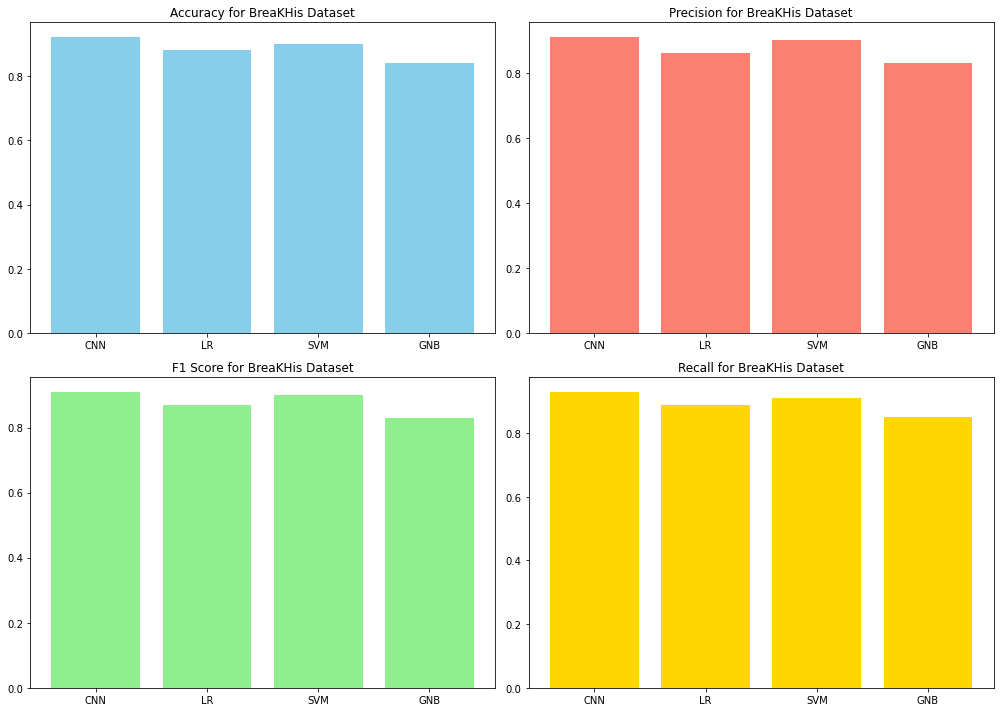

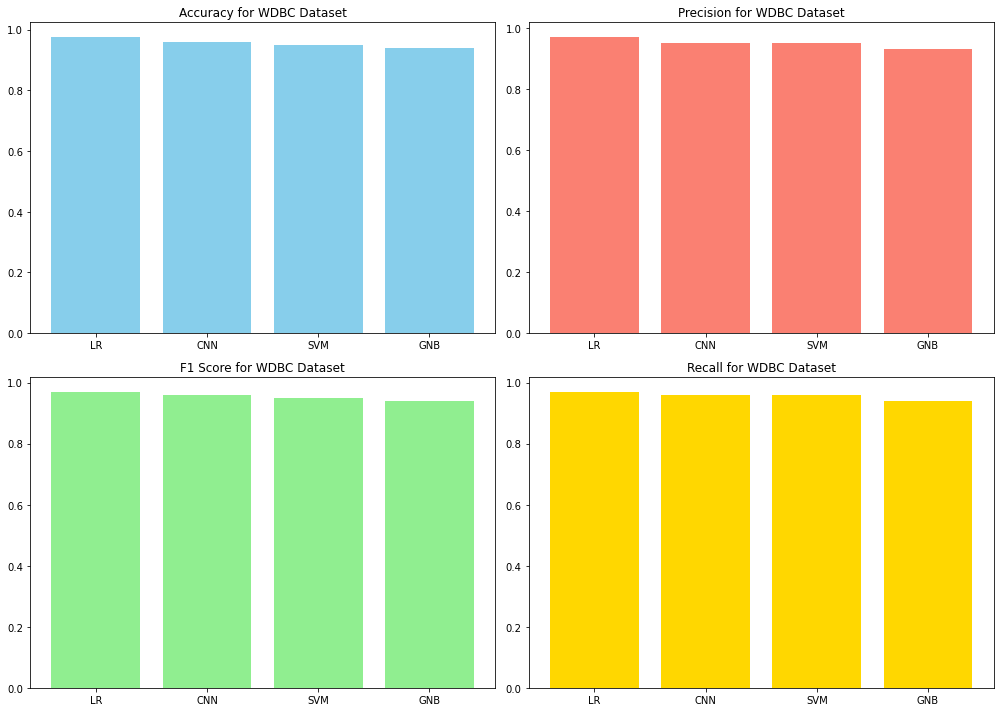

In [1]:
import matplotlib.pyplot as plt

# Data for BreaKHis dataset
breakhis_models = ['CNN', 'LR', 'SVM', 'GNB']
breakhis_accuracy = [0.92, 0.88, 0.90, 0.84]
breakhis_precision = [0.91, 0.86, 0.90, 0.83]
breakhis_f1_score = [0.91, 0.87, 0.90, 0.83]
breakhis_recall = [0.93, 0.89, 0.91, 0.85]

# Data for WDBC dataset
wdbc_models = ['LR', 'CNN', 'SVM', 'GNB']
wdbc_accuracy = [0.975, 0.96, 0.95, 0.94]
wdbc_precision = [0.97, 0.95, 0.95, 0.93]
wdbc_f1_score = [0.97, 0.96, 0.95, 0.94]
wdbc_recall = [0.97, 0.96, 0.96, 0.94]

# Plotting BreaKHis dataset
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.bar(breakhis_models, breakhis_accuracy, color='skyblue')
plt.title('Accuracy for BreaKHis Dataset')

plt.subplot(2, 2, 2)
plt.bar(breakhis_models, breakhis_precision, color='salmon')
plt.title('Precision for BreaKHis Dataset')

plt.subplot(2, 2, 3)
plt.bar(breakhis_models, breakhis_f1_score, color='lightgreen')
plt.title('F1 Score for BreaKHis Dataset')

plt.subplot(2, 2, 4)
plt.bar(breakhis_models, breakhis_recall, color='gold')
plt.title('Recall for BreaKHis Dataset')

plt.tight_layout()

# Plotting WDBC dataset
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.bar(wdbc_models, wdbc_accuracy, color='skyblue')
plt.title('Accuracy for WDBC Dataset')

plt.subplot(2, 2, 2)
plt.bar(wdbc_models, wdbc_precision, color='salmon')
plt.title('Precision for WDBC Dataset')

plt.subplot(2, 2, 3)
plt.bar(wdbc_models, wdbc_f1_score, color='lightgreen')
plt.title('F1 Score for WDBC Dataset')

plt.subplot(2, 2, 4)
plt.bar(wdbc_models, wdbc_recall, color='gold')
plt.title('Recall for WDBC Dataset')

plt.tight_layout()

plt.show()


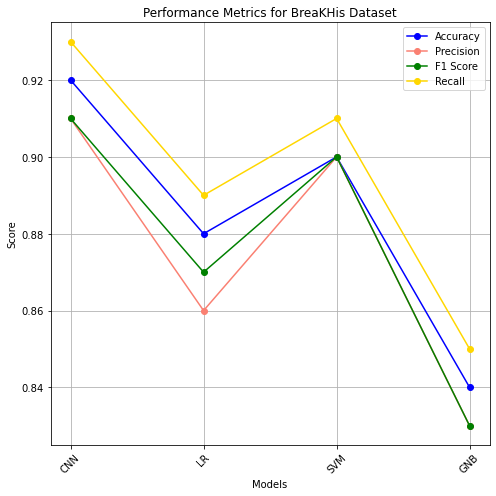

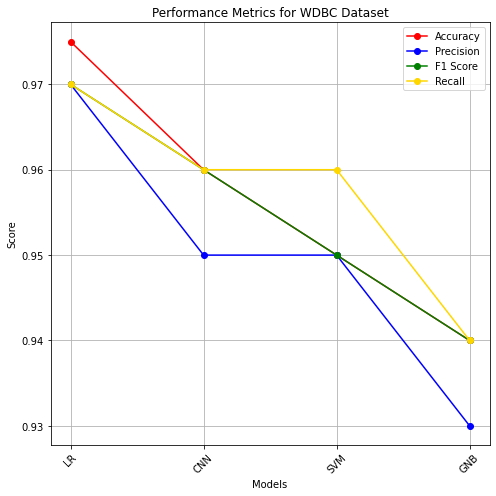

In [6]:
import numpy as np

# Data for BreaKHis dataset
breakhis_models = ['CNN', 'LR', 'SVM', 'GNB']
breakhis_accuracy = [0.92, 0.88, 0.90, 0.84]
breakhis_precision = [0.91, 0.86, 0.90, 0.83]
breakhis_f1_score = [0.91, 0.87, 0.90, 0.83]
breakhis_recall = [0.93, 0.89, 0.91, 0.85]

# Data for WDBC dataset
wdbc_models = ['LR', 'CNN', 'SVM', 'GNB']
wdbc_accuracy = [0.975, 0.96, 0.95, 0.94]
wdbc_precision = [0.97, 0.95, 0.95, 0.93]
wdbc_f1_score = [0.97, 0.96, 0.95, 0.94]
wdbc_recall = [0.97, 0.96, 0.96, 0.94]

# Plotting BreaKHis dataset
plt.figure(figsize=(7,7))

plt.plot(breakhis_models, breakhis_accuracy, marker='o', label='Accuracy', color='blue')
plt.plot(breakhis_models, breakhis_precision, marker='o', label='Precision', color='salmon')
plt.plot(breakhis_models, breakhis_f1_score, marker='o', label='F1 Score', color='green')
plt.plot(breakhis_models, breakhis_recall, marker='o', label='Recall', color='gold')

plt.title('Performance Metrics for BreaKHis Dataset')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# Plotting WDBC dataset
plt.figure(figsize=(7,7))

plt.plot(wdbc_models, wdbc_accuracy, marker='o', label='Accuracy', color='red')
plt.plot(wdbc_models, wdbc_precision, marker='o', label='Precision', color='blue')
plt.plot(wdbc_models, wdbc_f1_score, marker='o', label='F1 Score', color='green')
plt.plot(wdbc_models, wdbc_recall, marker='o', label='Recall', color='gold')

plt.title('Performance Metrics for WDBC Dataset')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [1]:
graph TD;
    style A fill:#F6DDCC,stroke:#000000,stroke-width:2px;
    style B fill:#FFE4B5,stroke:#000000,stroke-width:2px;
    style C fill:#FFDAB9,stroke:#000000,stroke-width:2px;
    style D fill:#FFA07A,stroke:#000000,stroke-width:2px;
    style E fill:#FF7F50,stroke:#000000,stroke-width:2px;
    style F fill:#FF6347,stroke:#000000,stroke-width:2px;
    style G fill:#FA8072,stroke:#000000,stroke-width:2px;
    
    A(Methodology) -- 📊 Data Retrieval --> B(Data Collection);
    B -- 🗃️ Contains --> C(Data Pre-processing);
    B -- 📤 Sends to --> D(Feature Extraction);
    D -- ✅ Confirms Data --> B;
    D -- 🧠 SVM; 🖼️ CNN; 📊 GNB; 📈 LR --> E(Best Model Choicer);
    B -- 📤 Sends to --> F(Model Training);
    F -- 📊 Generates Datasets --> B;
    F -- 📊 Model Evaluation --> G(Breast Cancer Diagnosis);
    G -- 📈 Performance Metrics --> B;



SyntaxError: invalid syntax (Temp/ipykernel_512/194928131.py, line 1)